<a href="https://colab.research.google.com/github/priyank-1/Deep_Learning/blob/main/Q4_DPL_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from keras.models import Sequential
from keras.layers import Input , Dense , Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet201 , preprocess_input as dense_input
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as res_input
from keras.applications.inception_v3 import InceptionV3 , preprocess_input as incep_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np


In [3]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/train'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/test'

In [11]:
resnet = ResNet50(include_top = False , input_shape = IMAGE_SIZE + [3] ,weights="imagenet" )

In [13]:
for layer in resnet.layers :
  layer.trainable = False

In [14]:
folders = glob('/content/drive/MyDrive/Colab_Notebooks/Datasets/train/*')
x = Flatten()(resnet.output)
prediction = Dense(len(folders) , activation = "softmax")(x)

model = Model(inputs = resnet.input , outputs = prediction )
model.summary()
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255)
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/Datasets/train',
    target_size = [224,224],
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['audi','mercedes','lamborghini']
)

test_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/Datasets/test',
    target_size = [224,224],
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['audi','mercedes','lamborghini']

)

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [17]:
reg = model.fit(
                 training_set,
                validation_data = test_set,
                 steps_per_epoch=len(training_set),
                 validation_steps = len(test_set),
                 epochs = 50,
)

Epoch 1/50
2/2 [==============================] - 47s 28s/step - loss: 5.1872 - accuracy: 0.2812 - val_loss: 3.7494 - val_accuracy: 0.3621
Epoch 2/50
2/2 [==============================] - 25s 17s/step - loss: 6.7546 - accuracy: 0.3281 - val_loss: 1.2143 - val_accuracy: 0.5517
Epoch 3/50
2/2 [==============================] - 34s 28s/step - loss: 2.5347 - accuracy: 0.4844 - val_loss: 8.4765 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 28s 19s/step - loss: 6.1062 - accuracy: 0.3750 - val_loss: 9.5842 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 37s 27s/step - loss: 5.0550 - accuracy: 0.5000 - val_loss: 6.5323 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 30s 22s/step - loss: 2.6552 - accuracy: 0.4844 - val_loss: 1.4779 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 38s 29s/step - loss: 2.0576 - accuracy: 0.5312 - val_loss: 2.7367 - val_accuracy: 0.5517
Epoch 8/50
2/2 [===========

In [18]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
y_pred = model.predict(test_set)

2/2 [==============================] - 13s 6s/step


In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2])

In [21]:
model=load_model('model_resnet50.h5')
img=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Datasets/test/lamborghini/11.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=res_input(x)
print(img_data.shape)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
print(a==1)

(1, 224, 224, 3)
1/1 [==============================] - 0s 200ms/step
[False]


# DENSENET

In [22]:
densenet = DenseNet201(include_top = False , input_shape = IMAGE_SIZE + [3] ,weights="imagenet" )

74836368/74836368 [==============================] - 0s 0us/step


In [24]:
for layer in densenet.layers :
  layer.trainable = False

folders = glob('/content/drive/MyDrive/Colab_Notebooks/Datasets/train/*')

x = Flatten()(densenet.output)
prediction = Dense(len(folders) ,activation = "softmax")(x)

model = Model(inputs = densenet.input ,outputs = prediction)
model.summary()
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

den = model.fit(
    training_set,
    validation_data = test_set,
    steps_per_epoch = len(training_set)  ,
    validation_steps = len(test_set),
    epochs = 50 ,
)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [32]:
from tensorflow.keras.models import load_model

model.save('model_densenet201.h5')

y_pred = model.predict(test_set)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
model=load_model('model_densenet201.h5')
img=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Datasets/test/mercedes/34.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
img_data=dense_input(x)
img_data.shape
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
print(a==1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 10s 3s/step
[1 0 0 1 2 2 0 2 2 2 0 1 2 2 2 1 1 1 0 1 1 2 2 0 2 2 2 2 2 0 2 1 2 2 2 2 2
 0 2 2 2 1 2 0 1 2 1 2 2 0 1 1 1 2 2 2 2 2]


1/1 [==============================] - 0s 342ms/step
[ True]


# INCEPTION v3

In [26]:
inception = InceptionV3(include_top = False , input_shape = IMAGE_SIZE + [3] ,weights="imagenet" )

87910968/87910968 [==============================] - 1s 0us/step


In [27]:
for layer in inception.layers :
  layer.trainable = False

folders = glob('/content/drive/MyDrive/Colab_Notebooks/Datasets/train/*')

x = Flatten()(inception.output)
prediction = Dense(len(folders) ,activation = "softmax")(x)

model = Model(inputs = inception.input ,outputs = prediction)
model.summary()
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

incep = model.fit(
    training_set,
    validation_data = test_set,
    steps_per_epoch = len(training_set)  ,
    validation_steps = len(test_set),
    epochs = 50 ,
)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [28]:
from tensorflow.keras.models import load_model

model.save('model_inception_v3.h5')

y_pred = model.predict(test_set)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
model=load_model('model_inception_v3.h5')
img=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Datasets/test/audi/25.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
img_data= incep_input(x)
img_data.shape
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
print(a==1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 9s 4s/step
[1 2 2 2 0 2 2 2 1 2 2 0 2 2 0 0 2 2 2 1 2 0 2 2 1 2 2 2 1 2 1 2 2 2 0 2 1
 1 0 2 1 2 2 1 1 2 2 0 0 2 0 1 1 2 2 1 2 1]
1/1 [==============================] - 0s 142ms/step
[ True]


# ResNet50

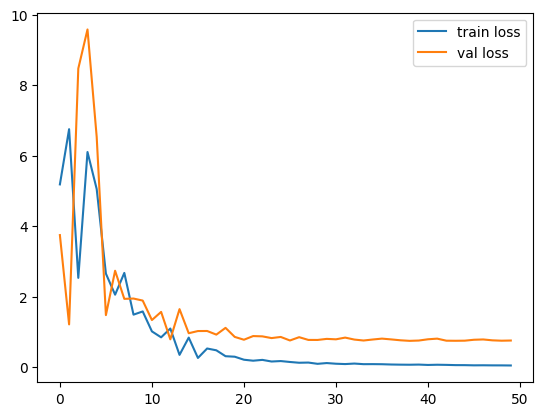

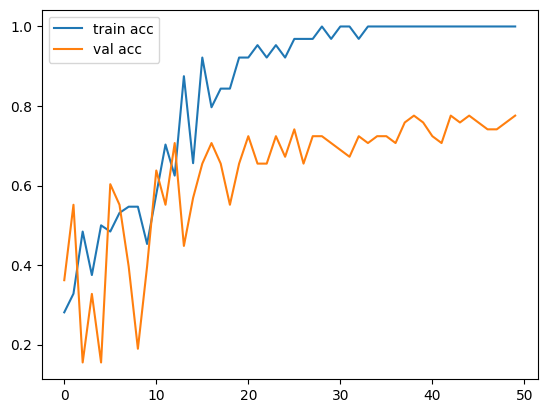

<Figure size 640x480 with 0 Axes>

In [29]:

plt.plot(reg.history['loss'], label='train loss')
plt.plot(reg.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(reg.history['accuracy'], label='train acc')
plt.plot(reg.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# DenseNet


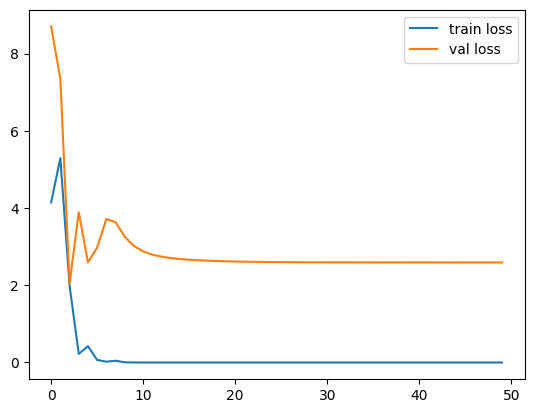

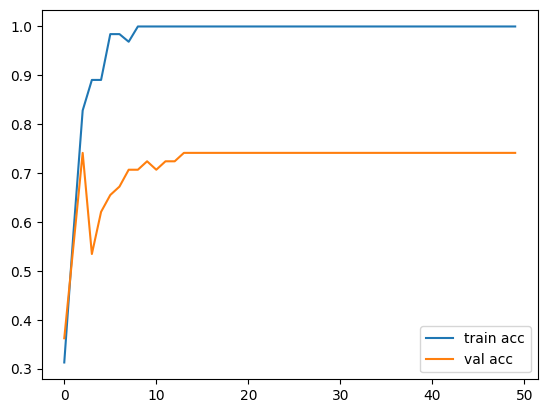

<Figure size 640x480 with 0 Axes>

In [30]:

plt.plot(den.history['loss'], label='train loss')
plt.plot(den.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(den.history['accuracy'], label='train acc')
plt.plot(den.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Inception V3


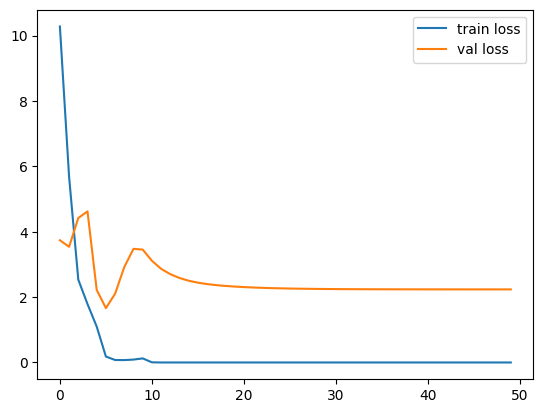

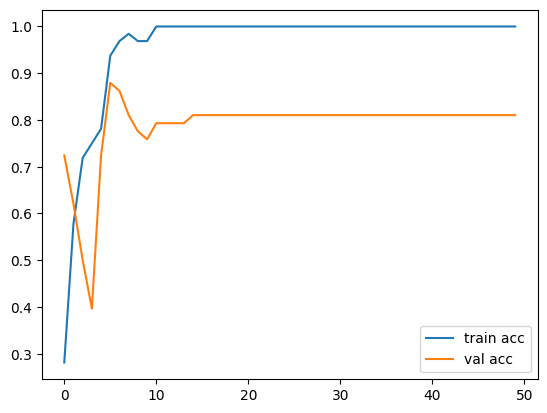

<Figure size 640x480 with 0 Axes>

In [31]:

plt.plot(incep.history['loss'], label='train loss')
plt.plot(incep.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(incep.history['accuracy'], label='train acc')
plt.plot(incep.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')